[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson4/hometask/Cluster.ipynb)

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
# Colab Version
!wget https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv

--2022-09-09 16:34:30--  https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6431598 (6.1M) [text/plain]
Saving to: ‘test_cluster.csv’

test_cluster.csv    100%[===================>]   6.13M  --.-KB/s    in 0.02s   

2022-09-09 16:34:30 (333 MB/s) - ‘test_cluster.csv’ saved [6431598/6431598]



In [4]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [6]:
df['gender'].value_counts()

М    25403
F    23874
Name: gender, dtype: int64

In [7]:
df['city_type'].value_counts()

<100        15421
100-500     10727
Mega         8954
1M+          7908
500-1000     6990
Name: city_type, dtype: int64

In [8]:
df['full_mob'].value_counts()

5      1519
3      1298
4      1234
81     1174
1      1103
       ... 
185       1
214       1
178       1
195       1
183       1
Name: full_mob, Length: 185, dtype: int64

In [9]:
df['isipoteka']=df['ml_balance'].apply(lambda x: 1 if x>0 else 0)

In [10]:
df['isipoteka'].value_counts()

0    49426
1      574
Name: isipoteka, dtype: int64

In [11]:
df['ispotreb']=df['cl_balance_0m'].apply(lambda x: 1 if x>0 else 0)
df['ispotreb'].value_counts()

0    41767
1     8233
Name: ispotreb, dtype: int64

In [12]:
df['iskredit']=df['loan_balance_0m'].apply(lambda x: 1 if x>0 else 0)
print(df[df['loan_balance_0m']>0]['loan_balance_0m'].mean())
print(df[df['cl_balance_0m']>0]['cl_balance_0m'].mean())
print(df[df['ml_balance']>0]['ml_balance'].mean())
df['iskredit'].value_counts()

364220.966989602
366433.2886214017
1122076.9579547038


0    38844
1    11156
Name: iskredit, dtype: int64

In [13]:
df['isdeposit']=df['td_balance_0m'].apply(lambda x: 1 if x>0 else 0)
print(df[df['td_balance_0m']>0]['td_balance_0m'].mean())
print(df[df['casa_balance_0m']>0]['casa_balance_0m'].mean())
df['isdeposit'].value_counts()

1260313.6528342331
79858.64904344679


0    47222
1     2778
Name: isdeposit, dtype: int64

In [14]:
#помимо потреба и ипотеки есть еще какие-то типы задолженностей
df[(df['iskredit']==1)&((df['ispotreb']==0)&(df['isipoteka']==0))].sort_values('loan_balance_0m',ascending=False)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,isipoteka,ispotreb,iskredit,isdeposit
16504,41,М,Mega,9,0.0,0.0,1775898.53,0.0,0.00,30,...,0.0,0.0,NaN,11924.688333,NaN,7302.230000,0,0,1,0
48075,38,М,100-500,81,0.0,0.0,1169044.68,0.0,0.00,23,...,0.0,0.0,NaN,26855.161304,NaN,111590.494500,0,0,1,0
3311,38,F,100-500,90,0.0,0.0,1164583.17,0.0,0.00,72,...,0.0,0.0,NaN,51228.160417,208.985774,115910.048870,0,0,1,0
25721,50,М,100-500,85,0.0,0.0,1152027.99,0.0,0.00,53,...,0.0,0.0,NaN,47632.075472,2529.920354,52936.167032,0,0,1,0
46071,47,М,500-1000,157,0.0,0.0,1123835.64,0.0,0.00,10,...,0.0,0.0,NaN,147500.000000,1.630437,189994.212150,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,56,F,500-1000,159,0.0,0.0,91.65,0.0,0.00,0,...,0.0,0.0,NaN,NaN,NaN,3445.779231,0,0,1,0
24416,42,М,<100,35,0.0,0.0,81.66,0.0,284.02,147,...,0.0,0.0,NaN,1563.485102,0.043737,2818.053674,0,0,1,0
37087,62,М,<100,34,0.0,0.0,31.06,0.0,17.45,0,...,0.0,0.0,NaN,NaN,NaN,1883.864486,0,0,1,0
45839,42,М,100-500,138,0.0,0.0,14.98,0.0,0.00,119,...,0.0,0.0,NaN,3597.109916,1.620194,NaN,0,0,1,0


In [15]:
#признак наличия кредита есть только у тех, у кого есть потреб или ипотека. "Это подразумевает, что потребы и ипотечники "сидят" в подмножестве тех, у кого есть кредит. Как бы включаются туда."
df[(df['iskredit']==0)&((df['ispotreb']==1)|(df['isipoteka']==1))] #.sort_values('loan_balance_0m',ascending=False)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,isipoteka,ispotreb,iskredit,isdeposit


In [16]:
#Но нашлись 5 записей, у которых общая кредитная задолженность меньше, чем сумма задолженности по ипотеке и по кредиту
df[(df['loan_balance_0m']<(df['cl_balance_0m']+df['ml_balance']))] #.sort_values('loan_balance_0m',ascending=False)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,isipoteka,ispotreb,iskredit,isdeposit
11836,47,F,Mega,86,7370482.98,622241.37,7992724.35,0.0,20037.1200,2,...,644461.43,676112.085000,NaN,2827.880000,0.140470,195612.767770,1,1,1,0
22515,32,F,100-500,106,103783.53,542973.55,646757.08,0.0,137.9400,0,...,550000.00,91081.129167,NaN,NaN,NaN,12780.741520,1,1,1,0
37159,35,М,500-1000,136,999926.31,164148.84,1164075.15,0.0,0.0000,1,...,168871.84,176745.994170,NaN,1200.000000,38.571773,28911.907007,1,1,1,0
46597,40,М,Mega,153,2578051.81,244298.95,2822350.76,0.0,71722.2631,1456,...,264323.74,192806.489170,NaN,1336.282988,0.009146,23061.775817,1,1,1,0
49079,46,М,<100,62,2193819.47,113497.33,2307316.80,0.0,165885.5900,2,...,136282.92,173058.766670,NaN,1324.720000,0.013466,100702.830180,1,1,1,0


In [17]:
df1=df[(df['loan_balance_0m']<(df['cl_balance_0m']+df['ml_balance']))] 

In [18]:
df1['razn'] = (df1['loan_balance_0m']-df1['cl_balance_0m']-df1['ml_balance']).round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# вывод: кредитная задолженность все ж таки включается в себя потреб и ипотеку полностью. т.е. потреб и ипотека - это подмножества кредитов. данные корректны
df1['razn']

11836   -0.0
22515   -0.0
37159   -0.0
46597   -0.0
49079   -0.0
Name: razn, dtype: float64

In [20]:
#средняя длительность взаимоотношения с банком 53 месяца, максимальная 236 месяцев, минимальная 0 месяцев.
print(df['full_mob'].mean())
df.sort_values('full_mob',ascending=False)

53.64282


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,isipoteka,ispotreb,iskredit,isdeposit
14669,44,М,Mega,236,0.0,0.00,257113.64,0.000,0.000,110,...,0.00,0.000000,NaN,8511.597636,45.759683,72707.244835,0,0,1,0
43547,43,F,Mega,236,0.0,896396.57,896396.57,0.000,220161.150,319,...,922405.23,708650.515000,NaN,2324.477022,0.027653,32798.900411,0,1,1,0
26493,47,F,Mega,214,0.0,0.00,0.00,0.000,33722.875,939,...,0.00,0.000000,NaN,1075.766560,0.060230,3613.478354,0,0,0,0
40829,54,М,Mega,195,0.0,0.00,0.00,113206.826,112714.540,14,...,0.00,0.000000,0.042676,2698.449320,0.025477,15557.549849,0,0,0,1
22585,63,F,1M+,185,0.0,0.00,0.00,0.000,101.390,0,...,0.00,289.006667,NaN,NaN,NaN,1258.368424,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46059,64,М,Mega,0,0.0,0.00,0.00,5000000.000,0.000,0,...,0.00,0.000000,0.000000,NaN,NaN,3276.940536,0,0,0,1
3032,44,NaN,<100,0,0.0,0.00,0.00,0.000,15300.000,1,...,0.00,0.000000,NaN,2000.000000,0.130719,NaN,0,0,0,0
26653,36,F,Mega,0,0.0,0.00,0.00,0.000,270.010,0,...,0.00,0.000000,NaN,NaN,NaN,NaN,0,0,0,0
15317,53,F,1M+,0,0.0,0.00,0.00,0.000,0.000,0,...,0.00,0.000000,NaN,NaN,NaN,NaN,0,0,0,0


In [21]:
#заемщики начинаются с возраста 22 года и заканчиваются в 71 год. похоже на правду. мусорных данных нет
df[(df['iskredit']!=0)|(df['ispotreb']!=0)|(df['isipoteka']!=0)].sort_values('age',ascending=False)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,isipoteka,ispotreb,iskredit,isdeposit
9927,71,F,500-1000,60,0.0,0.00,6491.53,0.0,0.00,23,...,0.00,0.000000,NaN,9560.869565,NaN,1302.531396,0,0,1,0
4182,70,М,500-1000,123,0.0,0.00,250.00,0.0,173391.46,550,...,0.00,0.000000,NaN,1325.881673,0.008321,8662.451123,0,0,1,0
23603,69,F,Mega,53,0.0,0.00,9216.24,0.0,86.63,230,...,0.00,3306.125833,NaN,1047.219000,0.339084,4079.442305,0,0,1,0
42624,68,F,500-1000,159,0.0,0.00,17100.67,0.0,0.11,184,...,0.00,0.000000,NaN,874.994130,1.126053,783.322361,0,0,1,0
14963,68,М,<100,78,0.0,186362.37,240322.37,0.0,15076.29,11,...,200000.00,48332.922500,NaN,25481.818182,0.651071,22761.982191,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,22,F,100-500,2,0.0,765122.71,765122.71,0.0,43676.15,0,...,782122.91,773584.006670,NaN,NaN,NaN,13638.881970,0,1,1,0
5793,22,М,<100,18,0.0,445366.67,445366.67,0.0,111769.61,321,...,445366.67,74227.778333,NaN,2758.696137,0.071183,9731.266879,0,1,1,0
25768,22,М,100-500,25,0.0,211690.10,211690.10,0.0,18764.65,688,...,211690.10,35281.683333,NaN,766.423169,0.029134,13352.808872,0,1,1,0
11992,22,F,Mega,11,0.0,307564.73,307564.73,0.0,195285.35,788,...,307564.73,47223.009167,NaN,390.241472,0.013151,523.448764,0,1,1,0


In [22]:
#сегментируем по длительность взимоотношений с банком
df['loaylty']=df['full_mob'].apply(lambda x: 'до года' if x<12 else ('до 5 лет' if x<12*5  else ('до 10 лет' if x<120 else 'больше 10 лет')))

In [23]:
#37% - сегмент, у которого длительность взаимоотношений с банком от 1 года до 5 лет. куда уходят клиенты после 10 лет отношений?
df['loaylty'].value_counts(normalize=True)

до 5 лет         0.37380
до 10 лет        0.27592
до года          0.22790
больше 10 лет    0.12238
Name: loaylty, dtype: float64

In [24]:
#основной доход генерит сегмент, у которого длительность взаимоотношений с банком от 5 до 10 лет
df.groupby('loaylty')['income'].sum().sort_values(ascending=False)

loaylty
до 10 лет        4.679811e+08
до 5 лет         3.855792e+08
до года          2.528188e+08
больше 10 лет    1.940368e+08
Name: income, dtype: float64

In [25]:
#основной чистый доход генерит сегмент, у которого длительность взаимоотношений с банком от 5 до 10 лет. минимальный - сегмент "до года". видимо, по ним высокие операционные расходы.
df.groupby('loaylty')['nbi'].sum().sort_values(ascending=False)

loaylty
до 10 лет        2.393834e+08
до 5 лет         1.768290e+08
больше 10 лет    1.087050e+08
до года          4.846865e+07
Name: nbi, dtype: float64

In [26]:
# основной доход - за счет кредитов.
df.groupby('iskredit')['nbi'].sum().sort_values(ascending=False)

iskredit
1    3.813621e+08
0    1.920239e+08
Name: nbi, dtype: float64

In [35]:
sns.set(style='darkgrid')  


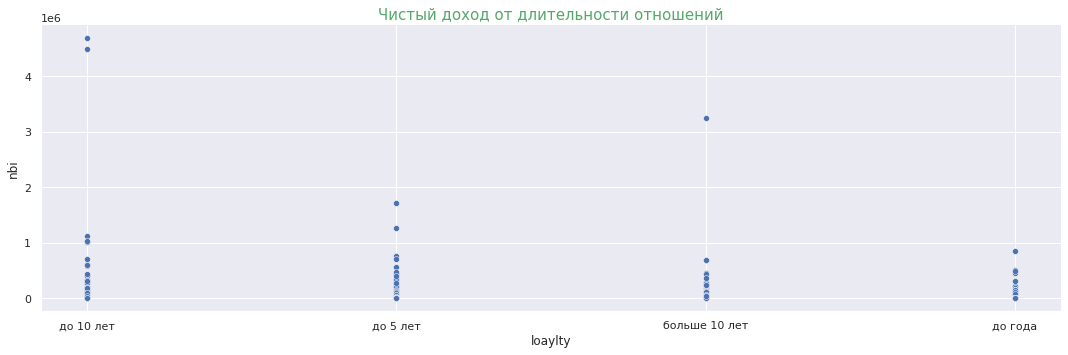

In [62]:
#в зависимости от длительности взаимоотношений с банком наибольший чистый доход банк получается от сегмента "от 5 до 10 лет".
# большой выброс в сегменте "свыше 10 лет"
sns.relplot(
    x='loaylty', 
    y='nbi', 
    data=df ,
    kind='scatter',
    aspect=3
)
plt.title('Чистый доход от длительности отношений', size=15, color='g');

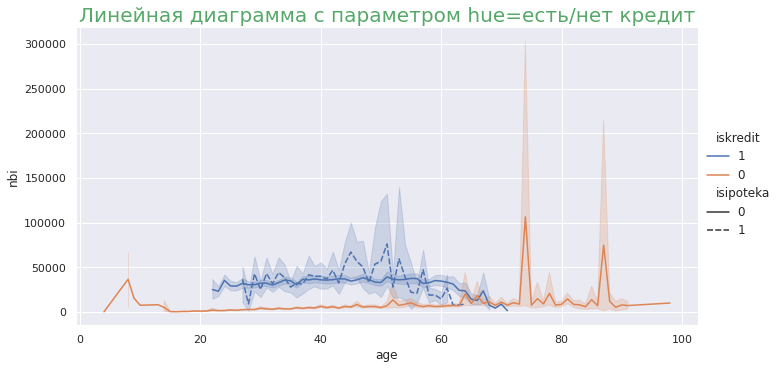

In [51]:
#в период кредитоспобности клиентов видно, что доход от заемщиков выше,чем от прочих клиентов. 
#по клиентам возраста 40-50 существенный доход от ипотеки
#Есть серьезные выбросы по доходам некредитного характера от клиентов в период пенсионого возраста 
g_order = [1,0]
sns.relplot(
    x='age', 
    y='nbi', 
    hue='iskredit', 
    hue_order=g_order,
    style='isipoteka',
    data=df, kind='line', aspect=2)
plt.title('Линейная диаграмма с параметром hue=есть/нет кредит', size=20, color='g');

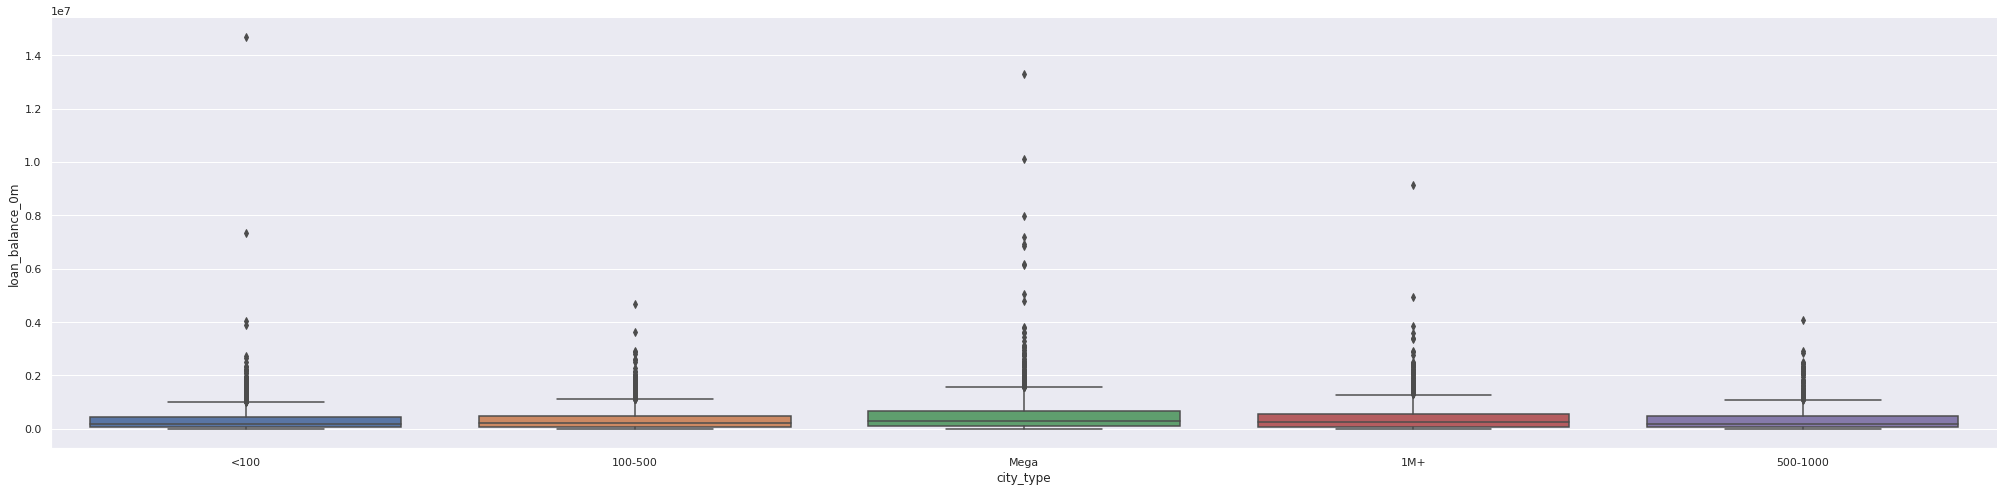

In [77]:
#остатки по кредитам наиболее высокие в мегаполисах и городах-миллионниках. ожидаемо. но есть выбросы по сегменту <100 тыс. возможно, частные дома.
sns.catplot(
    x='city_type', 
    y='loan_balance_0m', 
    data=df[df['iskredit']==1], 
    kind='box', 
    height=7,
    aspect=4)

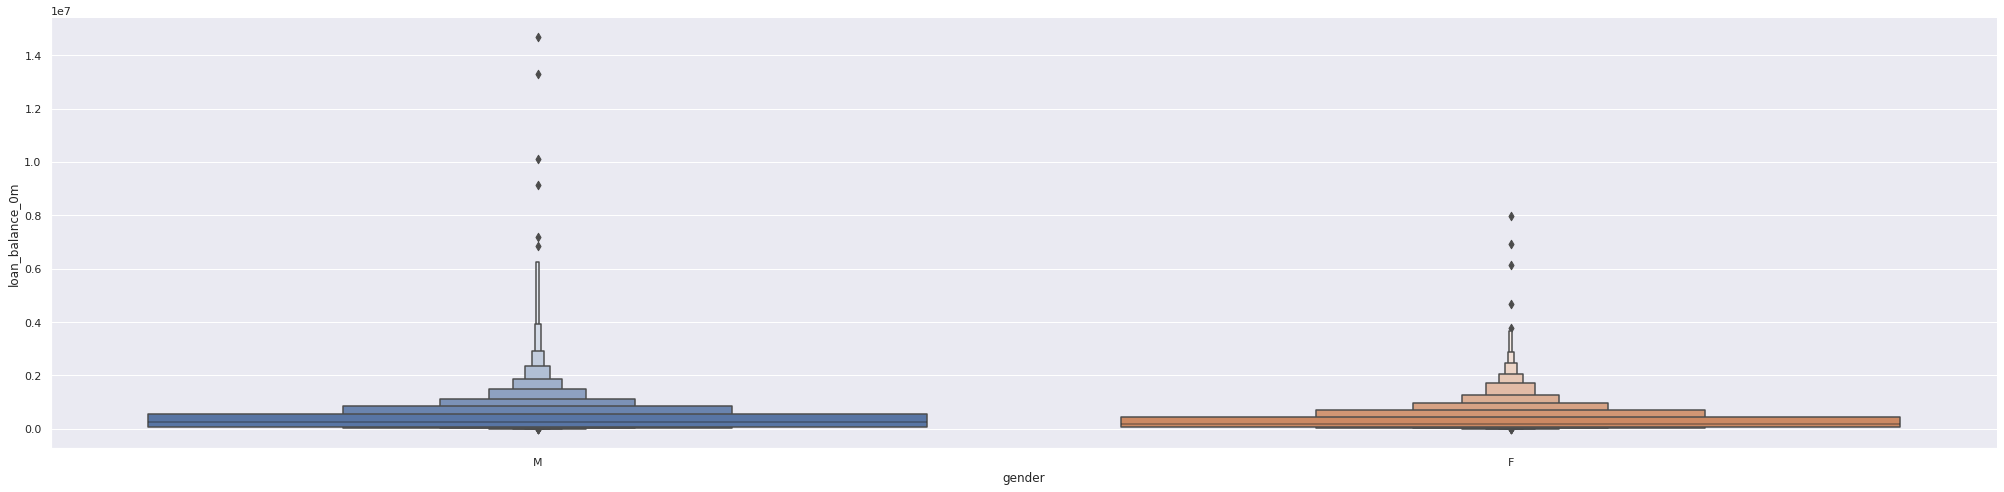

In [78]:
#остатки по кредитам выше у мужчин,чем у женщин. И выбросов у них больше. И разброс выше.
sns.catplot(
    x='gender', 
    y='loan_balance_0m', 
    data=df[df['iskredit']==1], 
    kind='boxen', 
    height=7,
    aspect=4)

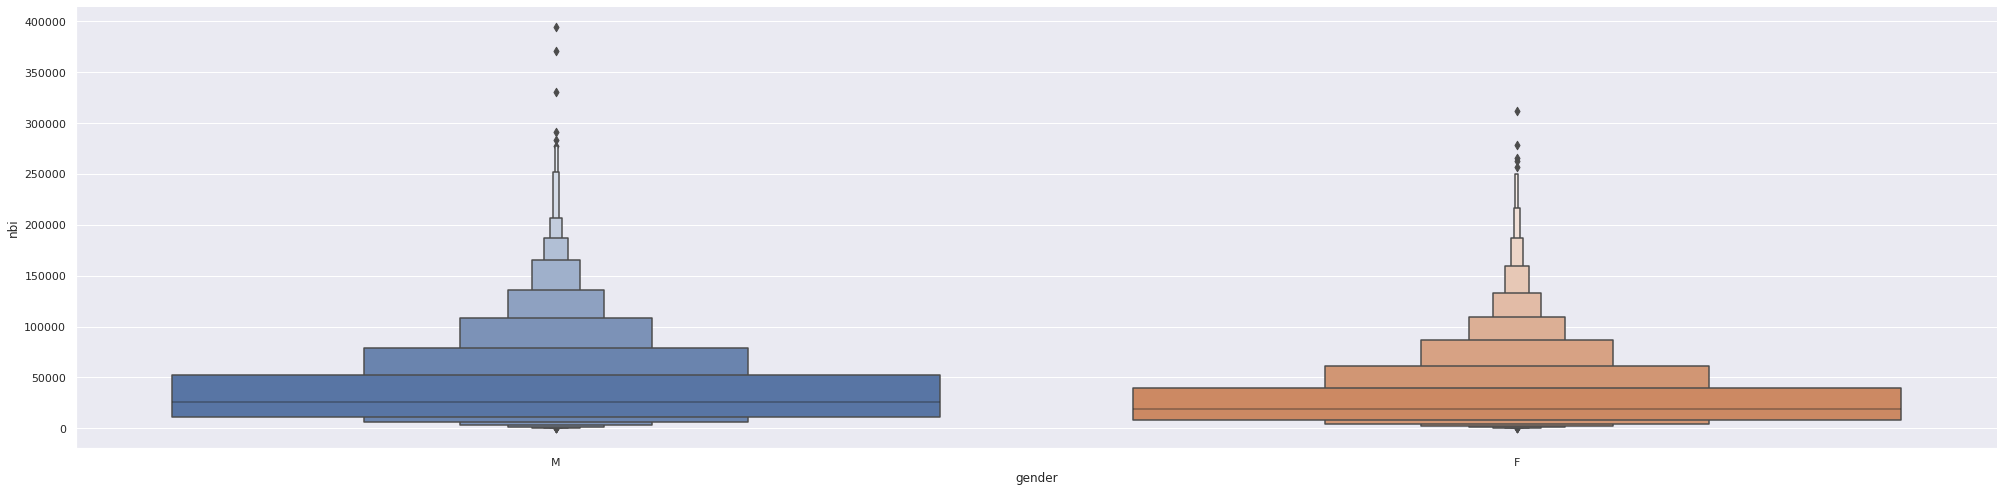

In [85]:
#мужчины-заемщики дают больший доход банку по сравнению с заемщиками-женщинами
sns.catplot(
    x='gender', 
    y='nbi', 
    data=df[df['iskredit']==1], 
    kind='boxen', 
    height=7,
    aspect=4)

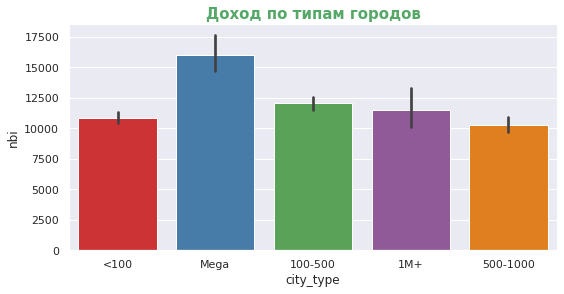

In [87]:
#наибольший чистый доход банк получает в мегаполисах
sns.catplot(
    data=df, 
    kind='bar', 
    x='city_type',
    y='nbi',
    height=4, 
    aspect=2,   
   # order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'],
    palette="Set1"
); 
plt.title('Доход по типам городов', size=15, color='g', 
          weight='bold');

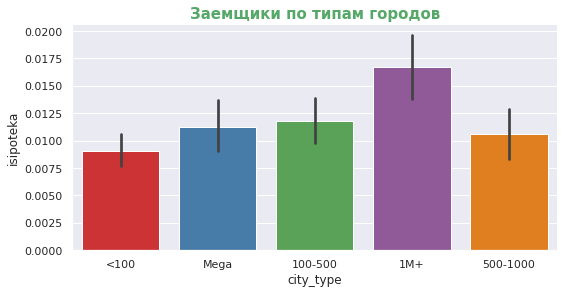

In [103]:
#заемщиков ипотеки больше всего в городах с населением 1М+.
sns.catplot(
    data=df, 
    kind='bar', 
    x='city_type',
    y='isipoteka',
    height=4, 
    aspect=2,
   # order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'],
    palette="Set1"
); 
plt.title('Заемщики по типам городов', size=15, color='g', 
          weight='bold');